<a href="https://colab.research.google.com/github/Nellie87/K_Means_Clustering_Algorithm/blob/main/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List



Implementing the distance function - Measure the distance btn 2 points during clustering process

In [3]:
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two points.

    Args:
        point1: First point coordinates (1D array)
        point2: Second point coordinates (1D array)

    Returns:
        float: Euclidean distance between the points
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))


Implementing centroid initialization

In [4]:
def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids randomly from the data points.

    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters

    Returns:
        np.ndarray: Initial centroids of shape (k, n_features)
    """
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]


Implementing the K-Means Algorithm

In [5]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        """
        Initialize KMeans instance.

        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Fit K-Means clustering to the data.

        Args:
            X: Input data of shape (n_samples, n_features)

        Returns:
            Tuple containing:
                - Cluster assignments for each point
                - Final centroid positions
        """
        # Step 1: Initialize centroids
        centroids = initialize_centroids(X, self.k)

        for i in range(self.max_iters):
            # Step 2: Assign clusters based on closest centroids
            clusters = self._assign_clusters(X, centroids)

            # Step 3: Update centroids by calculating the mean of each cluster
            new_centroids = self._update_centroids(X, clusters)

            # Step 4: Check for convergence
            if np.all(np.abs(new_centroids - centroids) < self.tol):
                break

            centroids = new_centroids

        return clusters, centroids

    def _assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign data points to the nearest centroid.

        Args:
            X: Input data
            centroids: Current centroids

        Returns:
            np.ndarray: Cluster assignments
        """
        clusters = np.zeros(X.shape[0])
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)
        return clusters

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        """
        Update centroids as the mean of the data points assigned to each cluster.

        Args:
            X: Input data
            clusters: Current cluster assignments

        Returns:
            np.ndarray: Updated centroids
        """
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points_in_cluster = X[clusters == i]
            centroids[i] = points_in_cluster.mean(axis=0) if len(points_in_cluster) > 0 else centroids[i]
        return centroids


Visualization function

In [6]:
def plot_clusters(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray):
    """
    Visualize the clusters and centroids.

    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids
    """
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.legend()
    plt.show()


Implement performance metric

In [7]:
def calculate_inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    """
    Calculate the within-cluster sum of squares (inertia).

    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids

    Returns:
        float: Inertia value
    """
    inertia = 0.0
    for i, point in enumerate(X):
        centroid = centroids[int(labels[i])]
        inertia += euclidean_distance(point, centroid) ** 2
    return inertia


Test implementation with dataset

In [8]:
from sklearn.datasets import make_blobs

X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)


Run K-means algorithm


k=2

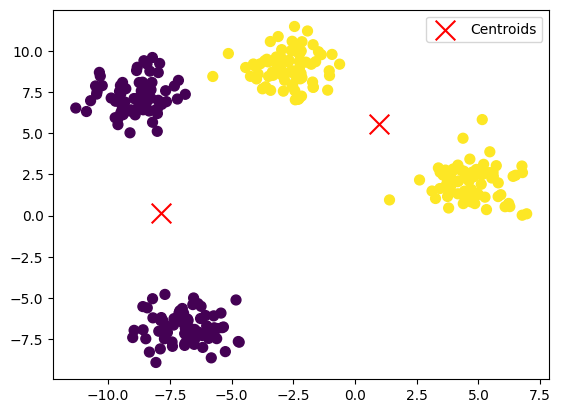

In [9]:
kmeans = KMeans(k=2)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=3

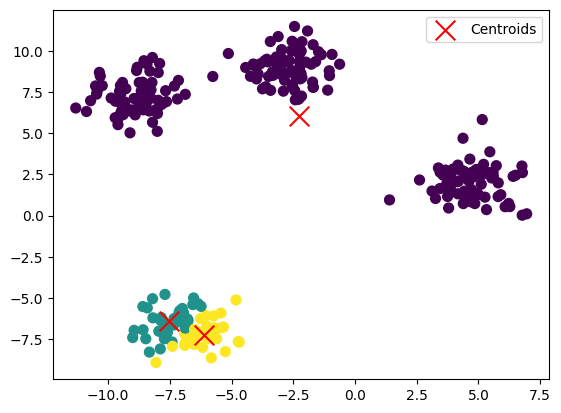

In [10]:
kmeans = KMeans(k=3)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=4

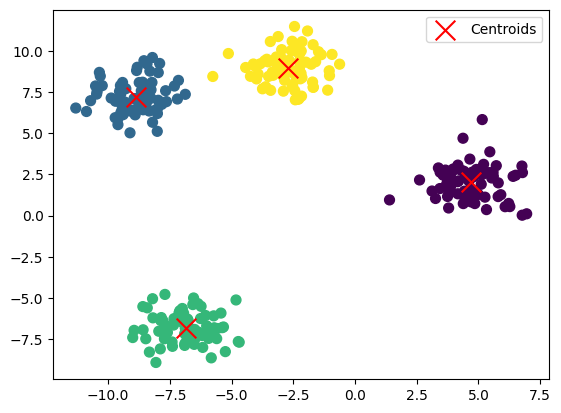

In [11]:
kmeans = KMeans(k=4)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=5


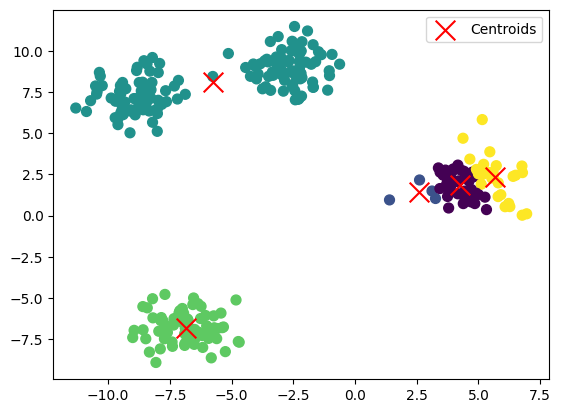

In [12]:
kmeans = KMeans(k=5)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


compare with Scikit-learn

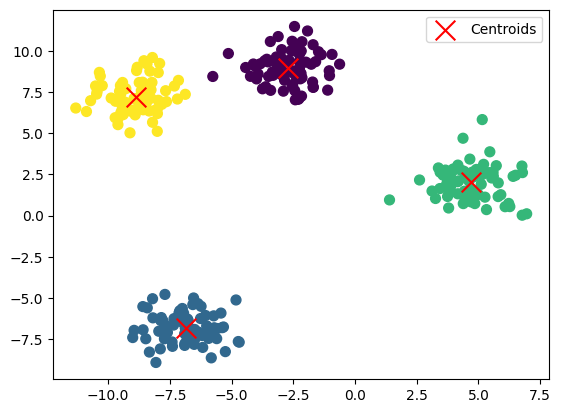

In [ ]:
from sklearn.cluster import KMeans as SklearnKMeans

sklearn_kmeans = SklearnKMeans(n_clusters=4, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X)

plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_)


Implement K-Means++ Initialization Method

It improves upon random centroid initialization by selecting initial centroids in a way that is more likely to speed up convergence. It starts by selecting the first centroid randomly and then selects subsequent centroids with a probability proportional to the distance squared from the nearest already selected centroid.


In [14]:
def initialize_centroids_kmeans_pp(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids using the K-Means++ method.

    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters

    Returns:
        np.ndarray: Initial centroids of shape (k, n_features)
    """
    centroids = [X[np.random.choice(X.shape[1])]]  # Start with one random centroid

    for _ in range(1, k):
        # Compute the distance of each point to the nearest centroid
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        probabilities = distances ** 2  # Square distances to get weighted probabilities

        # Choose the next centroid based on weighted probability
        next_centroid_idx = np.random.choice(X.shape[0], p=probabilities / np.sum(probabilities))
        centroids.append(X[next_centroid_idx])

    return np.array(centroids)


Handling empty clusters

In [16]:
def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
    """
    Update centroids as the mean of the data points assigned to each cluster.
    If a cluster is empty, reinitialize it to a random data point.

    Args:
        X: Input data
        clusters: Current cluster assignments

    Returns:
        np.ndarray: Updated centroids
    """
    centroids = np.zeros((self.k, X.shape[1]))

    for i in range(self.k):
        points_in_cluster = X[clusters == i]

        # Handle empty cluster by reinitializing it to a random data point
        if len(points_in_cluster) == 0:
            centroids[i] = X[np.random.choice(X.shape[0])]
        else:
            centroids[i] = points_in_cluster.mean(axis=0)

    return centroids


Implement the Elbow Method to Find Optimal k


In [17]:
def elbow_method(X: np.ndarray, max_k: int):
    """
    Apply the elbow method to find the optimal number of clusters.

    Args:
        X: Input data
        max_k: Maximum number of clusters to try

    Returns:
        None: Plots the elbow curve
    """
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(k=k)
        _, centroids = kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans._assign_clusters(X, centroids), centroids)
        inertias.append(inertia)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()


Add Support for Custom Distance Metrics


1.Modify the KMeans class constructor to accept a distance function:


In [ ]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4, distance_func=None):
        """
        Initialize KMeans instance.

        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
            distance_func: Custom distance function (default is Euclidean distance)
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.distance_func = distance_func if distance_func is not None else euclidean_distance


2.Modify the _assign_clusters method to use the custom distance function:

In [18]:
def _assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assign data points to the nearest centroid using the custom distance function.

    Args:
        X: Input data
        centroids: Current centroids

    Returns:
        np.ndarray: Cluster assignments
    """
    clusters = np.zeros(X.shape[0])

    for i, point in enumerate(X):
        distances = [self.distance_func(point, centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)

    return clusters
